In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zlib

from proto import image_pb2

# Setting pb

In [2]:
store_file_path = 'proto/IMAGE_STORE_FILE_ZLIB'

input_image_path = 'data/test_image.jpg'
output_image_path = 'data/test_image_d.jpg'

# Source

In [3]:
img = cv2.imread(input_image_path)

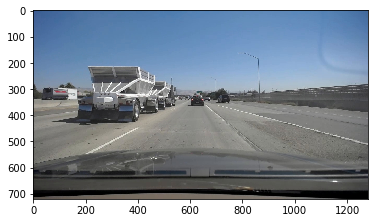

In [4]:
plt.imshow(img[:, :, [2, 1, 0]])

# Serialize

In [5]:
image = image_pb2.Image()

In [6]:
image.height = img.shape[0]
image.width = img.shape[1]
image.channel = img.shape[2]
image.data = np.ndarray.tobytes(img)

In [7]:
try:
    os.remove(store_file_path)
except:
    pass

In [8]:
with open(store_file_path, "wb") as f:
  f.write(zlib.compress(image.SerializeToString()))

# Deserialize

In [9]:
image_d = image_pb2.Image()

In [10]:
with open(store_file_path, "rb") as pb:
    image_d.ParseFromString(zlib.decompress(pb.read()))

In [11]:
height = image_d.height
width = image_d.width
channel = image_d.channel
data = image_d.data
img_np = np.frombuffer(data, np.uint8)
img_np = img_np.reshape(height, width, channel)

# Check

In [12]:
cv2.imwrite(output_image_path, img_np)

True

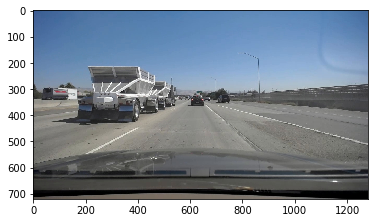

In [13]:
plt.imshow(img_np[:, :, [2, 1, 0]])